In [1]:
%cd ~/REVIVAL2
%load_ext autoreload
%autoreload 2
# %load_ext blackcellmagic

/disk2/fli/REVIVAL2


In [2]:
from scipy.stats import spearmanr
import pandas as pd
import numpy as np

In [3]:
df_4b = pd.read_csv("/disk2/fli/REVIVAL2/zs/vina/score/PfTrpB-4bromo_cofactor.csv")
df_4b[df_4b["vina"].isna()]

,AAs,fitness,var,n_mut,AA1,AA2,AA3,seq,enzyme,substrate,...,cofactor,cofactor-smiles,intermediate-smiles,vina_0,vina_1,vina_2,vina_3,vina_4,vina,vina_rank


In [4]:
# for each row take min of vina_0, vina_1, vina_2, vina_3, and vina_4
df_4b["vina_min"] = df_4b[["vina_0", "vina_1", "vina_2", "vina_3", "vina_4"]].min(axis=1)
df_4b

,AAs,fitness,var,n_mut,AA1,AA2,AA3,seq,enzyme,substrate,...,cofactor-smiles,intermediate-smiles,vina_0,vina_1,vina_2,vina_3,vina_4,vina,vina_rank,vina_min
0,AAV,-0.043328,I165A:I183A:Y301V,3,A,A,V,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-12.060,-6.403,-9.475,-6.046,-13.350,-9.4668,101.0,-13.350
1,ADL,0.061846,I165A:I183D:Y301L,3,A,D,L,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-9.639,-6.476,-10.270,-5.001,NaN,-7.8465,222.0,-10.270
2,AGC,0.005751,I165A:I183G:Y301C,3,A,G,C,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-13.270,-7.925,-8.141,-6.335,-13.130,-9.7602,67.0,-13.270
3,AGL,0.035926,I165A:I183G:Y301L,3,A,G,L,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-10.860,-9.100,-9.453,-7.207,-13.470,-10.0180,43.0,-13.470
4,AMN,-0.002284,I165A:I183M:Y301N,3,A,M,N,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-7.166,-6.116,-9.747,-5.861,-8.678,-7.5136,231.0,-9.747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,YSQ,0.001524,I165Y:I183S:Y301Q,3,Y,S,Q,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-14.990,-6.115,-13.950,-5.191,-5.590,-9.1672,133.0,-14.990
237,YTG,0.042463,I165Y:I183T:Y301G,3,Y,T,G,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-14.600,-5.735,-13.060,-4.631,-9.749,-9.5550,90.0,-14.600
238,YTM,0.142579,I165Y:I183T:Y301M,3,Y,T,M,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-14.240,-5.784,-11.280,-5.140,-5.872,-8.4632,193.0,-14.240
239,YVA,0.097324,I165Y:I183V:Y301A,3,Y,V,A,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-12.920,-7.855,-13.590,-6.319,-10.280,-10.1928,32.0,-13.590


In [9]:
# for each row take min of vina_0, vina_1, vina_2, vina_3, and vina_4
df_4b["vina_max"] = df_4b[["vina_0", "vina_1", "vina_2", "vina_3", "vina_4"]].max(axis=1)
df_4b

,AAs,fitness,var,n_mut,AA1,AA2,AA3,seq,enzyme,substrate,...,intermediate-smiles,vina_0,vina_1,vina_2,vina_3,vina_4,vina,vina_rank,vina_min,vina_max
0,AAV,-0.043328,I165A:I183A:Y301V,3,A,A,V,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-12.060,-6.403,-9.475,-6.046,-13.350,-9.4668,101.0,-13.350,-6.046
1,ADL,0.061846,I165A:I183D:Y301L,3,A,D,L,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-9.639,-6.476,-10.270,-5.001,NaN,-7.8465,222.0,-10.270,-5.001
2,AGC,0.005751,I165A:I183G:Y301C,3,A,G,C,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-13.270,-7.925,-8.141,-6.335,-13.130,-9.7602,67.0,-13.270,-6.335
3,AGL,0.035926,I165A:I183G:Y301L,3,A,G,L,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-10.860,-9.100,-9.453,-7.207,-13.470,-10.0180,43.0,-13.470,-7.207
4,AMN,-0.002284,I165A:I183M:Y301N,3,A,M,N,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-7.166,-6.116,-9.747,-5.861,-8.678,-7.5136,231.0,-9.747,-5.861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,YSQ,0.001524,I165Y:I183S:Y301Q,3,Y,S,Q,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-14.990,-6.115,-13.950,-5.191,-5.590,-9.1672,133.0,-14.990,-5.191
237,YTG,0.042463,I165Y:I183T:Y301G,3,Y,T,G,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-14.600,-5.735,-13.060,-4.631,-9.749,-9.5550,90.0,-14.600,-4.631
238,YTM,0.142579,I165Y:I183T:Y301M,3,Y,T,M,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-14.240,-5.784,-11.280,-5.140,-5.872,-8.4632,193.0,-14.240,-5.140
239,YVA,0.097324,I165Y:I183V:Y301A,3,Y,V,A,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-12.920,-7.855,-13.590,-6.319,-10.280,-10.1928,32.0,-13.590,-6.319


In [10]:
spearmanr(df_4b["fitness"], df_4b["vina"]), spearmanr(df_4b["fitness"], df_4b["vina_min"]), spearmanr(df_4b["fitness"], df_4b["vina_max"])

(SignificanceResult(statistic=-0.04461786883750761, pvalue=0.49057297083201823),
 SignificanceResult(statistic=-0.021670697902215083, pvalue=0.7378439182527392),
 SignificanceResult(statistic=0.05781451166790288, pvalue=0.37153383938998763))

In [6]:
import matplotlib.pyplot as plt

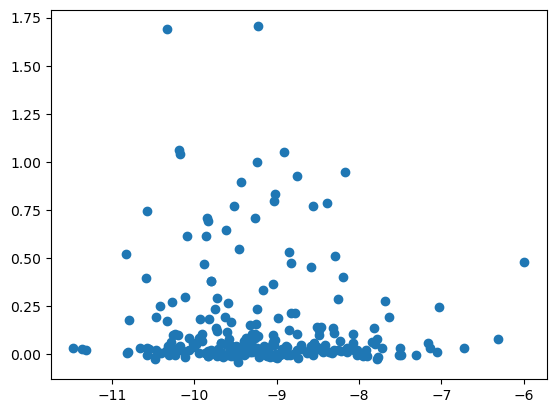

In [7]:
plt.scatter(df_4b["vina"], df_4b["fitness"])

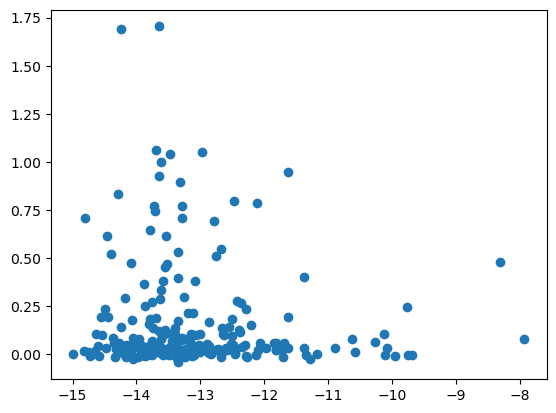

In [8]:
plt.scatter(df_4b["vina_min"], df_4b["fitness"])

In [23]:
df_4b_inactive = pd.read_csv("/disk2/fli/REVIVAL2/zs/vina/score/PfTrpB-4bromo_inactivated-cofactor.csv")
df_4b_inactive[df_4b_inactive["vina"].isna()]

,AAs,fitness,var,n_mut,AA1,AA2,AA3,seq,enzyme,substrate,...,cofactor,cofactor-smiles,intermediate-smiles,vina_0,vina_1,vina_2,vina_3,vina_4,vina,vina_rank


In [24]:
# for each row take min of vina_0, vina_1, vina_2, vina_3, and vina_4
df_4b_inactive["vina_min"] = df_4b_inactive[["vina_0", "vina_1", "vina_2", "vina_3", "vina_4"]].min(axis=1)
df_4b_inactive

,AAs,fitness,var,n_mut,AA1,AA2,AA3,seq,enzyme,substrate,...,cofactor-smiles,intermediate-smiles,vina_0,vina_1,vina_2,vina_3,vina_4,vina,vina_rank,vina_min
0,AAV,-0.043328,I165A:I183A:Y301V,3,A,A,V,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-12.260,-11.270,-11.510,-11.450,-12.140,-11.7260,8.0,-12.26
1,ADL,0.061846,I165A:I183D:Y301L,3,A,D,L,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-9.385,-10.370,-9.284,-8.202,-11.070,-9.6622,123.0,-11.07
2,AGC,0.005751,I165A:I183G:Y301C,3,A,G,C,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-10.900,-10.330,-10.800,-11.700,-11.460,-11.0380,49.0,-11.70
3,AGL,0.035926,I165A:I183G:Y301L,3,A,G,L,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-11.710,-10.440,-11.100,-11.330,-10.980,-11.1120,44.0,-11.71
4,AMN,-0.002284,I165A:I183M:Y301N,3,A,M,N,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-11.940,-12.260,-11.700,-11.460,-12.070,-11.8860,4.0,-12.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,YSQ,0.001524,I165Y:I183S:Y301Q,3,Y,S,Q,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-12.400,-10.390,-11.400,-11.240,-10.160,-11.1180,43.0,-12.40
237,YTG,0.042463,I165Y:I183T:Y301G,3,Y,T,G,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-11.780,-9.555,-10.750,-9.854,-9.536,-10.2950,85.0,-11.78
238,YTM,0.142579,I165Y:I183T:Y301M,3,Y,T,M,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-8.246,-4.645,-11.630,-4.221,-5.063,-6.7610,191.0,-11.63
239,YVA,0.097324,I165Y:I183V:Y301A,3,Y,V,A,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,-11.720,-9.162,-11.080,-11.480,-10.420,-10.7724,63.0,-11.72


In [25]:
spearmanr(df_4b_inactive["fitness"], df_4b_inactive["vina_rank"]), spearmanr(df_4b_inactive["fitness"], df_4b_inactive["vina_min"])

(SignificanceResult(statistic=0.08659607857597046, pvalue=0.1802903686431006),
 SignificanceResult(statistic=0.14135119310823116, pvalue=0.028236903188773525))

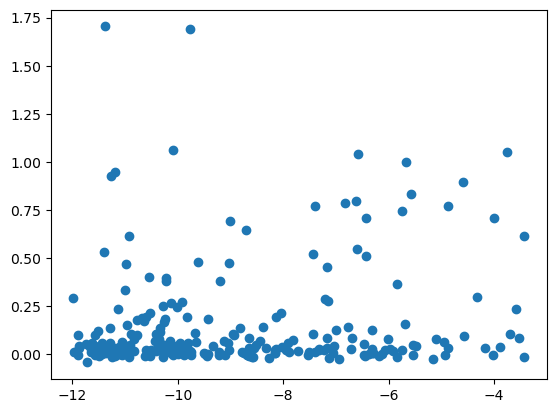

In [30]:
plt.scatter(df_4b_inactive["vina"], df_4b_inactive["fitness"])

In [33]:
chai_4b_inactive = pd.read_csv("/disk2/fli/REVIVAL2/zs/chai/output/PfTrpB-4bromo_inactivated-cofactor.csv")
chai_4b_inactive.head()

,var,rep,aggregate_score,ptm,iptm,chain_ptm_A,chain_ptm_B,chain_iptm_AB,chain_iptm_BA,has_inter_chain_clashes
0,I165A:I183A:Y301V,0,0.853672,0.950216,0.829536,0.951523,0.612929,0.519236,0.829536,False
1,I165A:I183A:Y301V,1,0.854554,0.950160,0.830652,0.951699,0.609123,0.505708,0.830652,False
2,I165A:I183A:Y301V,2,0.853499,0.950731,0.829191,0.952028,0.611788,0.513984,0.829191,False
3,I165A:I183A:Y301V,3,0.853769,0.950556,0.829572,0.951779,0.613500,0.519742,0.829572,False
4,I165A:I183A:Y301V,4,0.852863,0.950462,0.828463,0.951828,0.610994,0.511768,0.828463,False


In [36]:
avg_chai = (
                    chai_4b_inactive[~chai_4b_inactive["has_inter_chain_clashes"]]
                    .groupby("var")
                    .mean(numeric_only=True)
                    .drop(columns=["rep"])
                    .reset_index()
                )
avg_chai

,var,aggregate_score,ptm,iptm,chain_ptm_A,chain_ptm_B,chain_iptm_AB,chain_iptm_BA,has_inter_chain_clashes
0,I165A:I183A:Y301V,0.853671,0.950425,0.829483,0.951771,0.611667,0.514088,0.829483,0.0
1,I165A:I183D:Y301L,0.841553,0.945489,0.815569,0.946526,0.614877,0.507755,0.815569,0.0
2,I165A:I183G:Y301C,0.850305,0.951961,0.824890,0.953809,0.608488,0.502199,0.824890,0.0
3,I165A:I183G:Y301L,0.846176,0.947347,0.820884,0.947895,0.622362,0.519105,0.820884,0.0
4,I165A:I183M:Y301N,0.851084,0.950643,0.826194,0.952148,0.609538,0.502532,0.826194,0.0
...,...,...,...,...,...,...,...,...,...
236,Y301L,0.839990,0.946637,0.813328,0.947722,0.607897,0.504092,0.813328,0.0
237,Y301M,0.841571,0.948266,0.814897,0.949378,0.607432,0.503898,0.814897,0.0
238,Y301Q,0.842753,0.948624,0.816286,0.950278,0.601130,0.497075,0.816286,0.0
239,Y301T,0.848510,0.951083,0.822866,0.952654,0.602673,0.503218,0.822866,0.0


In [39]:
df = pd.read_csv("/disk2/fli/REVIVAL2/data/meta/not_scaled/PfTrpB-4bromo.csv")
df

,AAs,fitness,var,n_mut,AA1,AA2,AA3,seq,enzyme,substrate,substrate-smiles,cofactor,cofactor-smiles,intermediate-smiles
0,AAV,-0.043328,I165A:I183A:Y301V,3,A,A,V,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,C1=CC2=C(C=CN2)C(=C1)Br,PLP-dependent aminoacrylate.Na+,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...
1,ADL,0.061846,I165A:I183D:Y301L,3,A,D,L,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,C1=CC2=C(C=CN2)C(=C1)Br,PLP-dependent aminoacrylate.Na+,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...
2,AGC,0.005751,I165A:I183G:Y301C,3,A,G,C,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,C1=CC2=C(C=CN2)C(=C1)Br,PLP-dependent aminoacrylate.Na+,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...
3,AGL,0.035926,I165A:I183G:Y301L,3,A,G,L,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,C1=CC2=C(C=CN2)C(=C1)Br,PLP-dependent aminoacrylate.Na+,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...
4,AMN,-0.002284,I165A:I183M:Y301N,3,A,M,N,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,C1=CC2=C(C=CN2)C(=C1)Br,PLP-dependent aminoacrylate.Na+,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,YSQ,0.001524,I165Y:I183S:Y301Q,3,Y,S,Q,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,C1=CC2=C(C=CN2)C(=C1)Br,PLP-dependent aminoacrylate.Na+,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...
237,YTG,0.042463,I165Y:I183T:Y301G,3,Y,T,G,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,C1=CC2=C(C=CN2)C(=C1)Br,PLP-dependent aminoacrylate.Na+,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...
238,YTM,0.142579,I165Y:I183T:Y301M,3,Y,T,M,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,C1=CC2=C(C=CN2)C(=C1)Br,PLP-dependent aminoacrylate.Na+,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...
239,YVA,0.097324,I165Y:I183V:Y301A,3,Y,V,A,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,C1=CC2=C(C=CN2)C(=C1)Br,PLP-dependent aminoacrylate.Na+,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...


In [40]:
df_merged = pd.merge(df, avg_chai, on="var", how="outer")
df_merged

,AAs,fitness,var,n_mut,AA1,AA2,AA3,seq,enzyme,substrate,...,cofactor-smiles,intermediate-smiles,aggregate_score,ptm,iptm,chain_ptm_A,chain_ptm_B,chain_iptm_AB,chain_iptm_BA,has_inter_chain_clashes
0,AAV,-0.043328,I165A:I183A:Y301V,3,A,A,V,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,0.853671,0.950425,0.829483,0.951771,0.611667,0.514088,0.829483,0.0
1,ADL,0.061846,I165A:I183D:Y301L,3,A,D,L,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,0.841553,0.945489,0.815569,0.946526,0.614877,0.507755,0.815569,0.0
2,AGC,0.005751,I165A:I183G:Y301C,3,A,G,C,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,0.850305,0.951961,0.824890,0.953809,0.608488,0.502199,0.824890,0.0
3,AGL,0.035926,I165A:I183G:Y301L,3,A,G,L,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,0.846176,0.947347,0.820884,0.947895,0.622362,0.519105,0.820884,0.0
4,AMN,-0.002284,I165A:I183M:Y301N,3,A,M,N,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,0.851084,0.950643,0.826194,0.952148,0.609538,0.502532,0.826194,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,IIL,0.182719,Y301L,1,I,I,L,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,0.839990,0.946637,0.813328,0.947722,0.607897,0.504092,0.813328,0.0
237,IIM,0.110646,Y301M,1,I,I,M,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,0.841571,0.948266,0.814897,0.949378,0.607432,0.503898,0.814897,0.0
238,IIQ,0.135574,Y301Q,1,I,I,Q,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,0.842753,0.948624,0.816286,0.950278,0.601130,0.497075,0.816286,0.0
239,IIT,0.176759,Y301T,1,I,I,T,MWFGEFGGQYVPETLVGPLKELEKAYKRFKDDEEFNRQLNYYLKTW...,PfTrpB,4bromo,...,[O-]C1=C(/C=[N+]([H])/C(C([O-])=O)=C)C(CP([O-]...,CC1=C([O-])C(\C=[NH+]\[C@@H](CC2=CNC3=CC=CC(Br...,0.848510,0.951083,0.822866,0.952654,0.602673,0.503218,0.822866,0.0


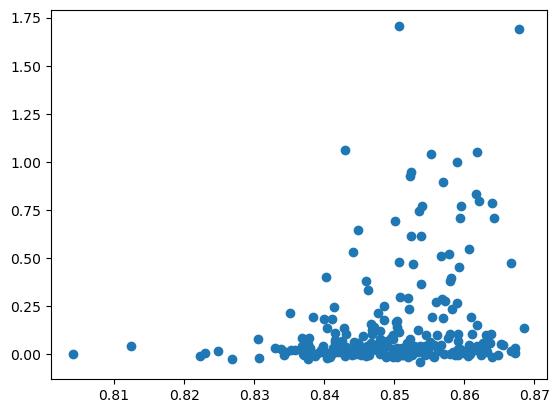

In [41]:
plt.scatter(df_merged["aggregate_score"], df_merged["fitness"])

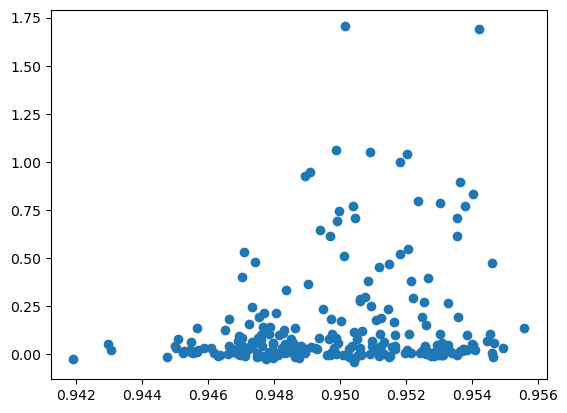

In [42]:
plt.scatter(df_merged["ptm"], df_merged["fitness"])

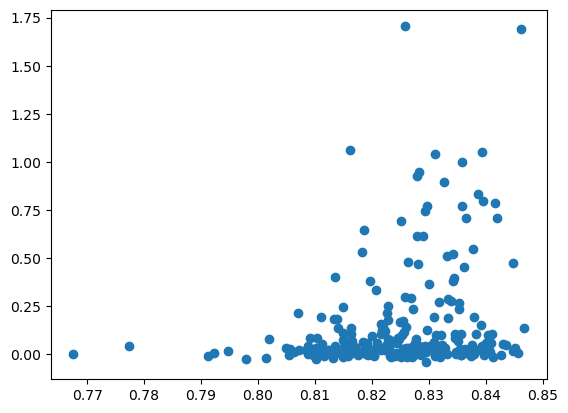

In [43]:
plt.scatter(df_merged["iptm"], df_merged["fitness"])

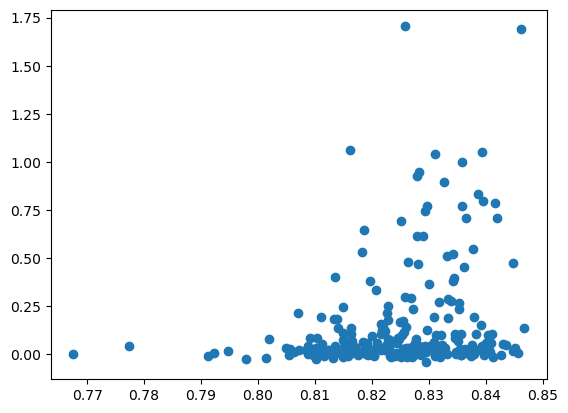

In [48]:
plt.scatter(df_merged["chain_iptm_BA"], df_merged["fitness"])

In [49]:
spearmanr(df_4b_inactive["vina"], df_merged["aggregate_score"])

SignificanceResult(statistic=-0.05737930313160327, pvalue=0.3751510319109238)